In [6]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [7, 3]
plt.rcParams['figure.dpi'] = 100
plt.style.use('seaborn-notebook')

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Implementação de métodos numéricos

Nesta seção iremos aprender como implementar, por meio de algoritmos, métodos numéricos para solução de uma EDO com Problema de Valor Inicial (PVI).

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [45]:
def quedalivre_analitico(t):
    g = 9.81
    cd = 0.25
    m = 68.1
    v = np.sqrt(g*m/cd)*np.tanh(np.sqrt(g*cd/m)*t)
    return v

treal = np.linspace(0, 20, 21)
vreal = quedalivre_analitico(treal)

## Método de Euler

O método de Euler é utilizado para resolver EDO's da forma:

\begin{equation} \label{eq:euler}
\dfrac{dy}{dt} = f(t,y)
\end{equation}

com condição inicial

\begin{equation} \label{eq:condicaoinicial}
y(t_0) = y_0
\end{equation}

Podemos deduzir o método de Euler a partir do teorema de Taylor:
    
\begin{equation}
y(t_i + h) =y(t_i) + h y'(t_i) + \dfrac{h^2}{2}y''(\xi_i)
\end{equation}

Assim:

\begin{equation}
y(t_i + h) = y(t_i) + h f(t,y) + \dfrac{h^2}{2}y''(\xi_i)
\end{equation}

\begin{equation}
y(t_i + h) \cong y(t_i) + h f(t,y)
\end{equation}



O método consiste em calcular o valor da função $y(t)$ a partir da sua derivada $\frac{dy}{dt}$ (eq. \ref{eq:euler}) e de uma condição inicial $y_0$ (PVI).

A idéia geral do método  consiste em utilizar a inclinação da função em um ponto para aproximar o valor em um ponto mais adiante.

![https://cn.ect.ufrn.br/index.php?r=conteudo%2Fedo-euler](figuras/euler_.svg)


Ou seja, obtemos o valor de $y_{i+1}$ a partir dos valores de $y_i$ e da inclinação dada pela derivada da função, $\frac{dy}{dt}$.
Matematicamente, temos que:

\begin{equation} \label{eq:euler12}
y_{i+1} = y_i + \dfrac{dy}{dt}h
\end{equation}

mas, como sabemos o valor da derivada, podemos substituí-la e obter a fórmula:

\begin{equation} \label{eq:euler2}
y_{i+1} = y_i + f(t_i , y_i)h
\end{equation}

onde $f(t_i, y_i)$ é a inclinação da função no instante $t_i$ (eq. \ref{eq:euler}) e $h$ é o passo dado ($h = x_{i+1} - x_i$).

A aproximação é realizada de forma linear e, quanto maior for o passo ou maior a taxa com que a função muda de direção, maior será o erro cometido.

O método continua tomando o valor de $y_{i+1}$ como sendo o novo $y_i$, e executando os mesmos passos repetidamente.

Ou seja, a partir de $y_0$ obtemos o valor de $y_1$, com o valor de $y_1$ obtemos o valor de $y_2$ e assim sucessivamente, utilizando a equação \ref{eq:euler2}.

![https://www.geogebra.org/m/kmp6yhma](figuras/euler2.png)


Vamos resolver a EDO:

\begin{equation}
\dfrac{dv}{dt} = g - \dfrac{c_d}{m}v^2
\end{equation}

implementando o método de Euler:

\begin{equation}
y_{i+1} = y_i + \dfrac{dy}{dt}h = y_i + f(t_i , y_i)h
\end{equation}

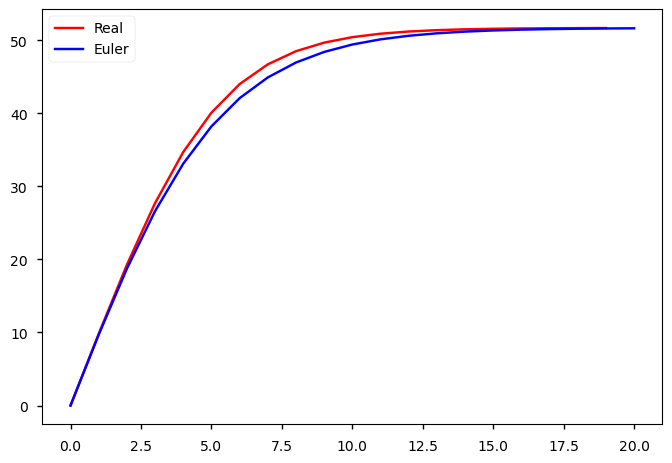

In [9]:
def quedalivre_edo(t, v):
    g = 9.81
    cd = 0.25
    m = 68.1
    dvdt =  g - cd/m*v**2
    return dvdt

h = 1 # passo
tf = 20 # tempo final da simulacao

niteracoes = int(tf/h) # calculando o número de iterações
v_euler = niteracoes*[None] # alocando o espaco para salvar as velocidades
tempo = niteracoes*[None] # alocando o espaco para salvar os tempos

v_euler[0] = 0 # condicao inicial
tempo[0] = 0 # vetor contendo os instantes

# Metodo de Euler para solucao de um PVI
for i in range(0, niteracoes - 1):
    v_euler[i + 1] = v_euler[i] + quedalivre_edo( tempo[i] , v_euler[i] )*h
    tempo[i + 1] = tempo[i] + h

plt.plot(tempo, v_euler, '-r', treal, vreal, '-b')
plt.legend(['Real', 'Euler'])

Vamos agora organizar melhor o código de forma a torná-lo mais genérico:

\begin{equation}
y_{i+1} = y_i + f(t_i , y_i)h
\end{equation}

In [31]:
# EDO definida no formato dy/dt = f(t, y)
def quedalivre_edo(t, y):
    g = 9.81
    cd = 0.25
    m = 68.1
    dydt =  g - cd/m*y**2
    return dydt

# Resolucao de uma EDO utilizando o método de Euler
def euler(f, y0, tinicial, tfinal, n):
    tempos, h = np.linspace(tinicial, tfinal, n, retstep=True)
    ti = tinicial
    y = n*[None]
    y[0] = y0
    i = 0;
    for ti_1 in tempos[0:-1]:
        y[i+1] = y[i] + f(ti, y[i] ) * h  

        ti = ti_1;
        i = i + 1;
    return y, tempos

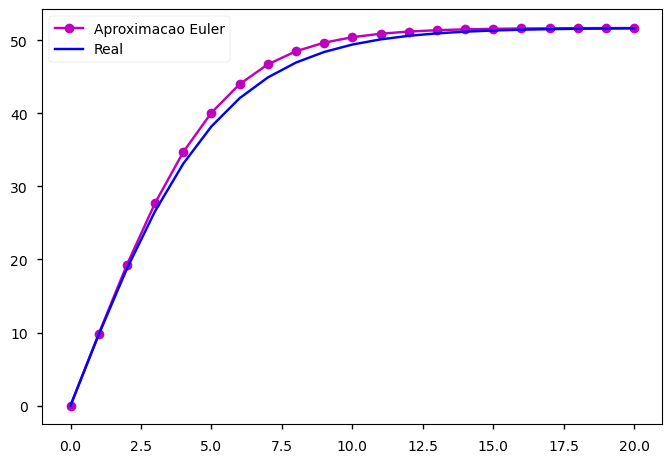

In [46]:
v0 = 0 # condicao inicial

v_euler2 ,t_euler2 = euler( quedalivre_edo, v0, 0, 20, 21) # resolucao do PVI

plt.plot(t_euler2, v_euler2, '-om', treal, vreal, '-b');
plt.legend(['Aproximacao Euler', 'Real']);

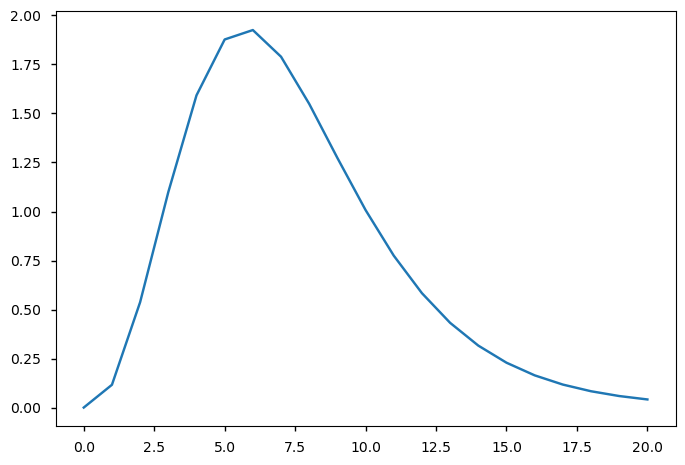

In [58]:
plt.plot(v_euler2 - vreal)

## Método do ponto médio

Uma modificação simples que podemos realizar no método de Euler é utilizarmos a inclinação no ponto $y_{i + 1/2}$ para estimar a inclinação média entre os pontos $i$ e $i+1$.

Deste modo, temos que:

\begin{equation} \label{eq:pontomedio}
\begin{array}{l}
y_{i+1/2} = y_i + f(t_i,y_i) \dfrac{h}{2} \\
y'_{i+1/2} = f(t_{i+1/2}, y_{i+1/2}) \\
y_{i+1} = y_i + h y'_{i+1/2}  
\end{array}
\end{equation}

![edopmedio1_.svg](figuras/edopmedio1_.svg)

Fonte: https://cn.ect.ufrn.br/index.php?r=conteudo%2Fedo-pontomedio

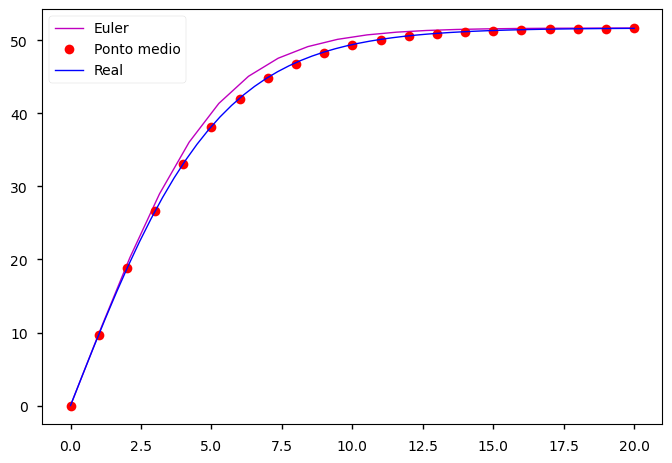

In [43]:
# Resolucao de uma EDO utilizando o método de Ponto Médio
def pontomedio(f, y0, tinicial, tfinal, n):
    tempos, h = np.linspace(tinicial, tfinal, n, retstep=True)
    ti = t[0]
    y = n*[None]
    y[0] = y0
    i = 0;
    for ti_1 in tempos[:-1]:
        yim = y[i] + f(ti, y[i])*h/2
        y[i+1] = y[i] + f(ti+h/2, yim)*h # y_{i+1} = y_i + h*f(y_i, t_i)

        ti = ti_1;
        i = i + 1;
    return y, tempos

t = np.linspace(0,20) # instantes usados no calculo
v0 = 0  # condicao inicial

v_pm, t_pm = pontomedio( quedalivre_edo, v0, 0, 20, 21) # resolucao do PVI

plt.plot(t_euler2, v_euler2, '-m', t_pm, v_pm, 'or', treal, vreal, '-b', lw=1);
plt.legend(['Euler', 'Ponto medio', 'Real']);

## Métodos de Runge-Kutta

Os métodos de Runge-Kutta consistem em uma família de métodos capazes de atingir a acurácia da abordagem por série de Taylor, sem a necessidade do cálculo das derivadas.

Os métodos de Runge-Kutta se caracterizam por terem o formato:

\begin{equation}\label{eq:rungekutta}
y_{i+1} = y_i + \phi h
\end{equation}

onde $\phi$ é chamada de função de incremento e tem a forma geral dada por:

\begin{equation}\label{eq:rungekutta2}
\phi = a_1 k_1 + a_2 k_2 + \ldots +  a_n k_n
\end{equation}

onde:

\begin{equation} \label{eq:rungekutta3}
\begin{array}{l}
k_1 &= f(t_i, y_i) \\
k_2 &= f(t_i + p_1h, y_i +q_{11}k_1h) \\
k_3 &= f(t_i + p_2h, y_i +q_{21}k_1h + q_{22}k_2h) \\
\vdots \\
k_n &= f(t_i + p_{n-1}h, y_i + q_{n-1,1}k_1h + q_{n-1,2}k_2h + \ldots + q_{n-1,n-1}k_{n-1}h) 
\end{array}
\end{equation}

### Runge-Kutta de segunda ordem

Os métodos de Runge-Kutta de segunda ordem são da forma:

\begin{equation} \label{eq:rungekutta2o}
y_{i+1} = y_i + (a_1k_1 +a_2k_2)h
\end{equation}

onde

\begin{equation} \label{eq:rungekutta2o2}
\begin{array}{l}
k_1 = f(t_i, y_i) \\
k_2 = f(t_i + p_1h, y_i + q_{11}k_1h)
\end{array}
\end{equation}

Além disso, os valores $a_1$, $a_2$, $p_1$ e $q_{11}$ devem ser equivalentes aos termos da expansão de série de Taylor, o que nos leva as seguintes restrições:

\begin{equation} \label{eq:rungekutta2o3}
\begin{array}{l}
a_1 + a_2 = 1 \\
a_2p_1 = 1/2 \\
a_2q_{11} = 1/2
\end{array}
\end{equation}

Em especial, temos que, se $a_2 =1$, $a_1 = 0$, $p_1 = 1/2$ e $q_{11} = 1/2$ a equação torna-se:

\begin{equation} \label{eq:rungekuttapm}
y_{i+1} = y_i +k_2h
\end{equation}

onde 
\begin{equation} \label{eq:rungekuttapm2}
\begin{array}{l}
k_1 = f(t_i,y_i) \\
k_2 = f(t_i + h/2, y_i + k_1h/2) 
\end{array}
\end{equation}

que corresponde às fórmulas do método do ponto médio (eq. \ref{eq:pontomedio})


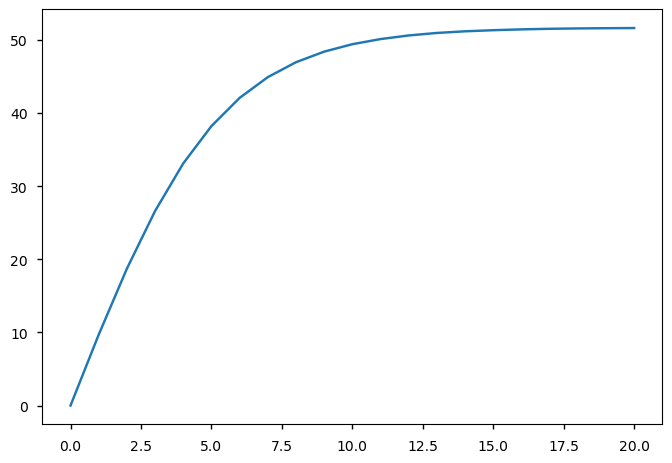

In [86]:
from scipy.integrate import solve_ivp
t = np.linspace(0,20,21)
sol = solve_ivp(quedalivre_edo, y0 = [0], t_span=[0,20], t_eval = t)
plt.plot(sol.y[0])

d:\system\conda_envs\cn\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


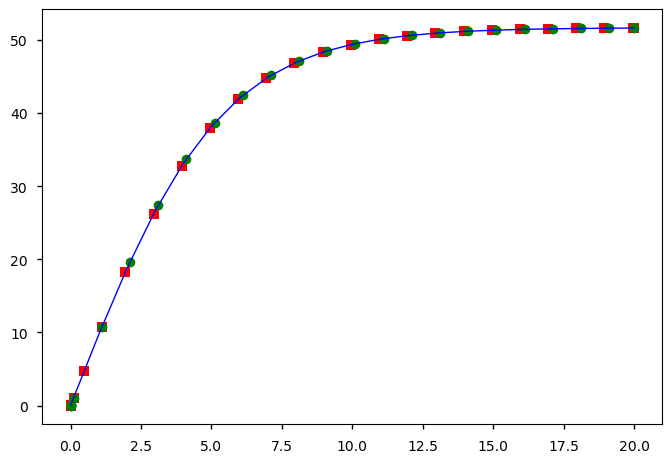

In [75]:
from scipy.integrate import RK45
from scipy.integrate import RK23

def quedalivre_edo(t, y):
    g = 9.81
    cd = 0.25
    m = 68.1
    dydt =  g - cd/m*y**2
    return dydt

y23 = [0]
y45 = [0]
t23 = [0]
t45 = [0]

solucao23 = RK23(quedalivre_edo, t0 = t23[0], y0 = [y23[0]], t_bound=20 , max_step=1)
solucao45 = RK45(quedalivre_edo, t0 = t45[0], y0 = [y45[0]], t_bound=20 , max_step=1)

while solucao23.status == 'running':
    solucao23.step()
    y23.append(solucao23.y)
    t23.append(solucao23.t)

while solucao45.status == 'running':
    solucao45.step()
    y45.append(solucao45.y)
    t45.append(solucao45.t)

plt.plot(t23,y23, 'sr', t45, y45, 'go', treal, vreal, 'b', lw=1)

### Método de Runge-Kutta de quarta ordem

Os métodos de Runge-Kutta mais populares são os de quarta ordem

Embora quanto maior a ordem mais precisa é a aproximação, o que se observa é que os métodos de quarta ordem geralmente produzem resultados com a precisão necessária, não sendo necessário a utilização de métodos de ordem superior, que envolvem um maior número de cálculos.

Embora existem infinitas versões, a forma clássica é definida como:

\begin{equation} \label{eq:rungekutta4o1}
y_{i+1} = y_i + \dfrac{1}{6}(k_1 + 2k_2 + 2k_3 +k_4)h
\end{equation}

onde 

\begin{equation} \label{eq:rungekutta4o2}
\begin{array}{l}
k_1 = f(t_i,y_i) \\
k_2 = f(t_i + \frac{1}{2}h, y_i + \frac{1}{2}k_1h) \\
k_3 = f(t_i + \frac{1}{2}h, y_i + \frac{1}{2}k_2h) \\
k_4 = f(t_i + h, y_i + k_3h) \\
\end{array}
\end{equation}

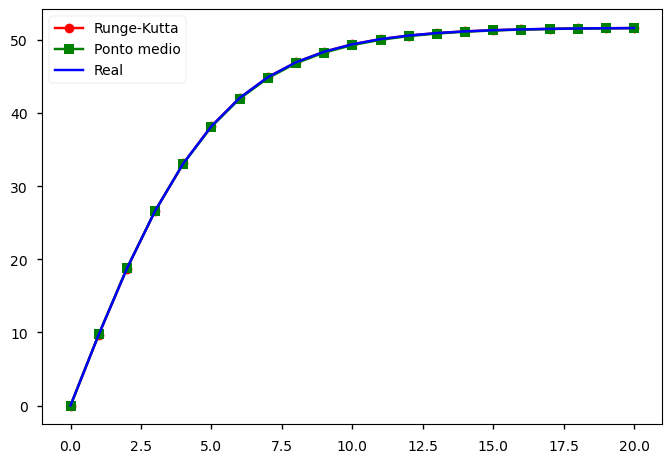

In [76]:
def rungekutta4(f, t, y0):
    ti = t[0]
    y = len(t)*[None]
    y[0] = y0
    i = 0
    for ti1 in t[1:]:
        h = ti1 - ti # h = t_{i+1} - t_i
        k1 = f(ti, y[i])
        k2 = f(ti + h/2, y[i] + k1*h/2)
        k3 = f(ti + h/2, y[i] + k2*h/2)
        k4 = f(ti + h,   y[i] + k3*h)
        y[i+1] = y[i] + h*(k1 + 2*k2 + 2*k3 + k4)/6; 

        ti = ti1;
        i = i + 1;
    return y

t = np.linspace(0,20, 21) # instantes usados no calculo
v0 = 0 # condicao inicial

v_rk = rungekutta4( quedalivre_edo, t, v0) # resolucao do PVI

plt.plot(t, v_rk, '-or', t, v_pm, '-sg', treal, vreal, '-xb');
plt.legend(['Runge-Kutta', 'Ponto medio', 'Real']);

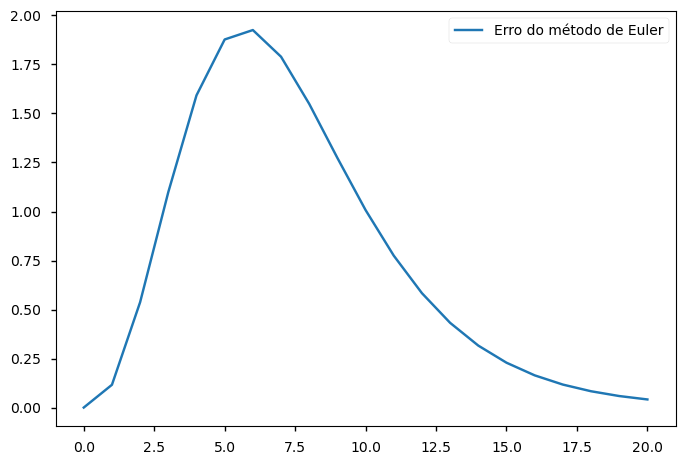

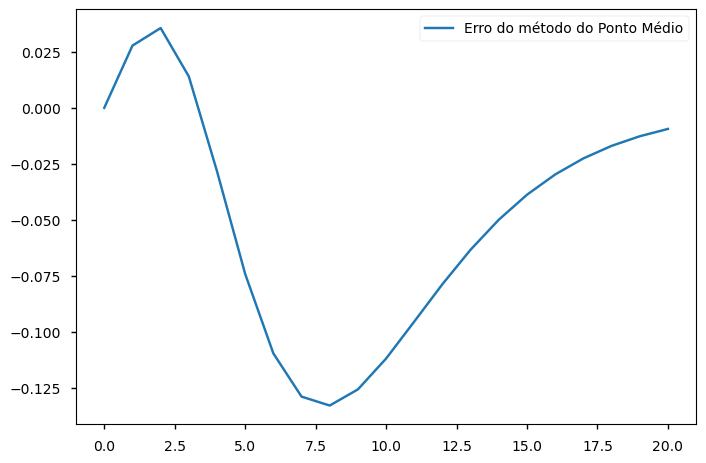

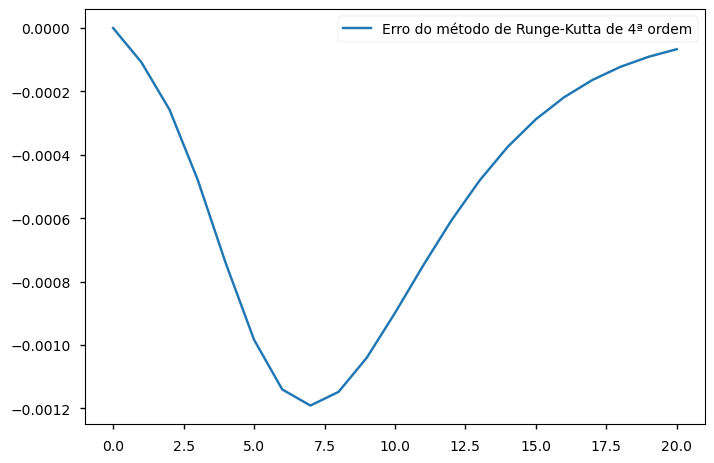

In [62]:
plt.plot(t, v_euler2 - vreal)
plt.legend(['Erro do método de Euler'])
plt.figure()
plt.plot(t, v_pm - vreal)
plt.legend(['Erro do método do Ponto Médio'])
plt.figure()
plt.plot(t, v_rk - vreal)
plt.legend(['Erro do método de Runge-Kutta de 4ª ordem'])
